# Tarea 4

# Emilio Hernández Arellano

# Datos Originales

## Entrenamiento

## Preelimniares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tsfel
import os

In [2]:
list_class = {
    "MW":"Caminar",
    "MR":"Correr",
    "MJ":"Saltar",
    "WD": "Bajar escaleras",
    "WU": "Saltar escaleras",
    "FF" : "Caida hacia delante",
    "FS" : "Caida lateral",
    "FB" : "Caida hacia atras",
    "LD" : "Tumbado",
    "OT" : "Otras clases"
}

In [3]:
def time_vector (N,fs=200):
    fs = 1/fs
    t = np.linspace(0,fs*N,N)
    return t

Text(0.5, 1.0, 'Time domain z')

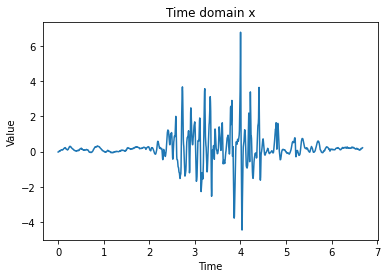

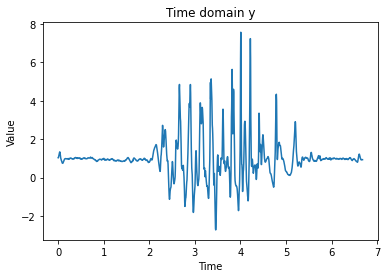

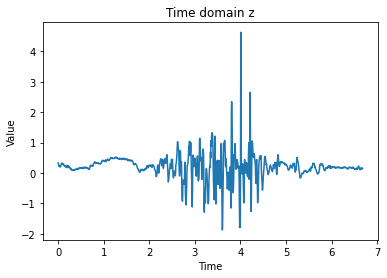

In [4]:
# Visulaizando señal individual

path_test = "C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original/Jhon Doe/Folder_file001_MR.csv"
df = pd.read_csv(path_test, names = ["x","y","z","time"])
x = df["x"]
y = df["y"]
z = df["z"]
N = len(x)
time = time_vector(N)
plt.figure()
plt.plot(time,x)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title ("Time domain x")
plt.figure()
plt.plot(time,y)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title ("Time domain y")
plt.figure()
plt.plot(time,z)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title ("Time domain z")

Text(0.5, 1.0, 'Time domain z')

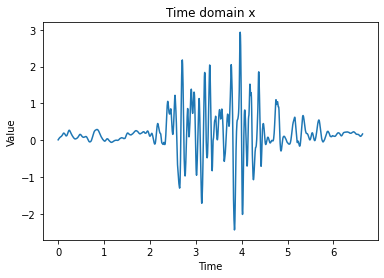

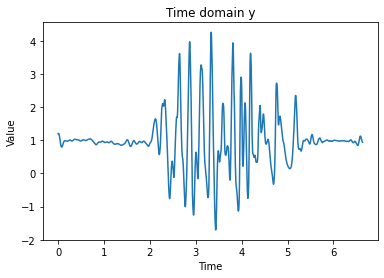

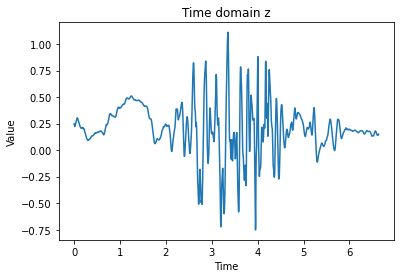

In [5]:
n = 10 #número de ventanas
x1 = pd.Series (x) .rolling (window = n) .mean (). iloc [n-1:]. values
y1 = pd.Series (y) .rolling (window = n) .mean (). iloc [n-1:]. values
z1 = pd.Series (z) .rolling (window = n) .mean (). iloc [n-1:]. values
N = len(x1)
time = time_vector(N)
plt.figure()
plt.plot(time,x1)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title ("Time domain x")
plt.figure()
plt.plot(time,y1)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title ("Time domain y")
plt.figure()
plt.plot(time,z1)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title ("Time domain z")

## Obteniendo características

In [6]:
from glob import glob

In [7]:
#Obteniendo la clase
def label_class(file):
    basename = os.path.basename(file)
    label = basename.split("_")[-1].split(".")[0]
    if label in list_class:
        label_1 = list_class[label]
    else:
        print(file)
        label_1 = None
    return label_1

In [8]:
#Filtro media movil opcional
def median_filter(column,n=10):
    c = pd.Series (column) .rolling (window = n) .mean (). iloc [n-1:]. values
    return c

In [9]:
def feature_csv(df,cfg=tsfel.get_features_by_domain(),fs=200,n=None,window=False):
    x = df["x"]
    y = df["y"]
    z = df["z"]
    if window and n>=1:
        x = median_filter(x,n=n)
        y = median_filter(y,n=n)
        z = median_filter(z,n=n)
    xf = tsfel.time_series_features_extractor(cfg,x, fs)
    yf = tsfel.time_series_features_extractor(cfg,y, fs)
    zf = tsfel.time_series_features_extractor(cfg,z, fs)
    f = pd.concat([xf,yf,zf],axis=1)
    return f

In [10]:
def load_data(path,train=True,n=None,window=False,fs=200):
    features = []
    if train:
        labels = []
        for file in glob(path):
            print(file)
            label = label_class(file)
            file_read = pd.read_csv(file,names=["x","y","z","time"])
            feature = feature_csv(file_read,n=n,window=window,fs=fs)
            feature = feature.values
            _,width = np.shape(feature)
            if label is not None and feature is not None and width == 1167:
                labels.append(label)
                features.extend(feature)
            elif label is None:
                print(file)
        labels = np.array(labels)
        features = np.array(features)
        return features,labels
    else:
        names = []
        for file in glob(path):
            file_read = pd.read_csv(file)
            """
            Dado que los 35 archivos aparecían ya con 
            las cabeceras, X,Y,Z, tiempo, se omite el paso
            En caso contrario de no tener cabecera:
            pd.read_csv(file,names=["x","y","z","time"])
            """
            feature = feature_csv(file_read,n=n,window=window)
            feature = feature.values
            _,width = np.shape(feature)
            if feature is not None and width == 1167:
                features.extend(feature)
                names.append(os.path.basename(file).split("_")[-1].split(".")[0])
        return np.array(features),names



In [11]:
path_train = "C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original/*/*.csv"
X,y = load_data(path_train)

C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file001_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file002_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file003_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file004_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file005_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file006_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file007_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file008_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file009_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file010_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file011_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file012_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file013_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file014_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file015_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file016_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file017_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file018_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file019_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file020_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file021_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file022_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file023_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file024_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file025_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file026_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file027_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file028_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file029_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file030_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file031_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file032_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file033_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file034_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file035_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file036_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file037_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file038_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file039_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file040_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file080_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file081_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file082_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file083_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file084_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file085_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file086_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file087_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file088_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file089_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file090_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file091_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file092_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file093_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file094_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file095_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file096_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file097_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file098_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file099_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file100_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file101_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file102_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file103_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file104_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file105_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file106_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file107_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file108_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file109_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file110_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file111_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file112_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file113_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file114_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file115_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file116_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file117_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file118_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file119_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file041_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file042_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file043_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file044_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file045_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file046_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file047_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file048_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file049_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file050_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file051_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file052_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file053_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file054_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file055_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file056_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file057_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file058_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file059_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file060_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file061_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file062_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file063_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file064_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file065_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file066_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file067_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file068_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file069_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file070_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file071_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file072_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file073_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file074_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file075_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file076_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file077_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file078_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file079_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file120_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file121_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file122_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file123_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file124_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file125_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file126_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file127_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file128_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file129_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file130_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file131_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file132_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file133_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file134_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file135_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file136_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file137_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file138_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file139_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file140_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file141_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file142_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file143_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file144_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file145_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file146_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file147_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file148_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file149_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file150_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file151_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file152_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file153_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file154_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file155_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file156_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


In [12]:
Xm,ym = load_data(path=path_train,window=True,n=10)

C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file001_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file002_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file003_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file004_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file005_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file006_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file007_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file008_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file009_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file010_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file011_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file012_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file013_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file014_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file015_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file016_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file017_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file018_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file019_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file020_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file021_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file022_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file023_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file024_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file025_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file026_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file027_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file028_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file029_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file030_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file031_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file032_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file033_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file034_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file035_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file036_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file037_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file038_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file039_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Jhon Doe\Folder_file040_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file080_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file081_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file082_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file083_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file084_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file085_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file086_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file087_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file088_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file089_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file090_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file091_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file092_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file093_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file094_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file095_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file096_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file097_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file098_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file099_MJ.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file100_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file101_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file102_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file103_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file104_LD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file105_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file106_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file107_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file108_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file109_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file110_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file111_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file112_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file113_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file114_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file115_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file116_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file117_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file118_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Johan Strauss\Folder_file119_OT.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file041_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file042_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file043_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file044_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file045_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file046_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file047_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file048_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file049_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file050_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file051_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file052_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file053_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file054_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file055_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file056_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file057_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file058_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file059_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file060_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file061_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file062_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file063_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file064_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file065_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file066_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file067_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file068_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file069_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file070_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file071_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file072_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file073_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file074_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file075_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file076_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file077_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file078_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Saint Seiya\Folder_file079_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file120_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file121_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file122_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file123_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file124_MR.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file125_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file126_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file127_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file128_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file129_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file130_WD.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file131_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file132_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file133_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file134_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file135_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file136_WU.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file137_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file138_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file139_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file140_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file141_MW.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file142_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file143_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file144_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file145_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file146_FB.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file147_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file148_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file149_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file150_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file151_FF.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file152_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file153_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file154_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file155_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Train/Original\Vicente Fernández\Folder_file156_FS.csv
*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


## F1 SCORE

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

### Random Forest

In [14]:
#Señal sin media movil Random Forest
forest_int_wmean = RandomForestClassifier(n_estimators=100)
Kfold = KFold(n_splits=10,random_state=42,shuffle=True)
y_test_indx,y_pred = [],[]
scores = []

for i,(train_indx,test_indx) in enumerate (Kfold.split(X,y)):
    y_test_indx.append(test_indx)
    X_train,X_test = X[train_indx],X[test_indx]
    y_train,y_test = y[train_indx], y[test_indx]
    forest_int_wmean.fit(X_train,y_train) #Entrenando random forest
    ypred = forest_int_wmean.predict(X_test)
    score = forest_int_wmean.score(X_test,y_test)
    scores.append(score)
    y_pred.append(ypred)

print("Con el modelo de Random Forest se tiene un accuracy de %0.2f y una std: %0.2f" 
% (np.mean(scores), np.std(scores) * 2))
y_pred1 = np.concatenate(y_pred).tolist()
y_index1 = np.concatenate(y_test_indx).tolist()
tuples = list(zip(y_index1,y_pred1))
sorted_tuples = sorted(tuples)
y_index1,y_pred1 = zip(*sorted_tuples)
print(classification_report(y,y_pred1))


Con el modelo de Random Forest se tiene un accuracy de 0.95 y una std: 0.13
                     precision    recall  f1-score   support

    Bajar escaleras       1.00      1.00      1.00        13
  Caida hacia atras       0.73      0.80      0.76        10
Caida hacia delante       0.89      0.80      0.84        10
      Caida lateral       0.89      0.80      0.84        10
            Caminar       1.00      1.00      1.00        20
             Correr       1.00      1.00      1.00        20
       Otras clases       1.00      0.97      0.98        29
             Saltar       0.91      1.00      0.95        20
   Saltar escaleras       1.00      1.00      1.00        13
            Tumbado       0.90      0.90      0.90        10

           accuracy                           0.95       155
          macro avg       0.93      0.93      0.93       155
       weighted avg       0.95      0.95      0.95       155



In [15]:
#Señal con media movil Random Forest
forest_int_mean = RandomForestClassifier(n_estimators=100)
Kfold = KFold(n_splits=10,random_state=42,shuffle=True)
y_test_indx,y_pred = [],[]
scores = []

for i,(train_indx,test_indx) in enumerate (Kfold.split(Xm,ym)):
    y_test_indx.append(test_indx)
    X_train,X_test = Xm[train_indx],Xm[test_indx]
    y_train,y_test = ym[train_indx], ym[test_indx]
    forest_int_mean.fit(X_train,y_train) #Entrenando random forest
    ypred = forest_int_mean.predict(X_test)
    score = forest_int_mean.score(X_test,y_test)
    scores.append(score)
    y_pred.append(ypred)

print("Con el modelo de Random Forest se tiene un accuracy de %0.2f y una std: %0.2f" 
% (np.mean(scores), np.std(scores) * 2))
y_pred1 = np.concatenate(y_pred).tolist()
y_index1 = np.concatenate(y_test_indx).tolist()
tuples = list(zip(y_index1,y_pred1))
sorted_tuples = sorted(tuples)
y_index1,y_pred1 = zip(*sorted_tuples)
print(classification_report(y,y_pred1))

Con el modelo de Random Forest se tiene un accuracy de 0.97 y una std: 0.12


ValueError: Found input variables with inconsistent numbers of samples: [155, 154]

In [16]:
#Random Forest con señal original y TSNE
X_emmbebed = TSNE(n_components=2,
                  perplexity=30,
                  random_state=42).fit_transform(X)
forest_tsne_wmean = RandomForestClassifier(n_estimators=100)
Kfold = KFold(n_splits=10,random_state=42,shuffle=True)
y_test_indx,y_pred = [],[]
scores = []

for i,(train_indx,test_indx) in enumerate (Kfold.split(X,y)):
    y_test_indx.append(test_indx)
    X_train,X_test = X_emmbebed[train_indx],X_emmbebed[test_indx]
    y_train,y_test = y[train_indx], y[test_indx]
    forest_tsne_wmean.fit(X_train,y_train) #Entrenando random forest
    ypred = forest_tsne_wmean.predict(X_test)
    score = forest_tsne_wmean.score(X_test,y_test)
    scores.append(score)
    y_pred.append(ypred)

print("Con el modelo de Random Forest se tiene un accuracy de %0.2f y una std: %0.2f" 
% (np.mean(scores), np.std(scores) * 2))
y_pred1 = np.concatenate(y_pred).tolist()
y_index1 = np.concatenate(y_test_indx).tolist()
tuples = list(zip(y_index1,y_pred1))
sorted_tuples = sorted(tuples)
y_index1,y_pred1 = zip(*sorted_tuples)
print(classification_report(y,y_pred1))


Con el modelo de Random Forest se tiene un accuracy de 0.50 y una std: 0.29
                     precision    recall  f1-score   support

    Bajar escaleras       0.38      0.38      0.38        13
  Caida hacia atras       0.83      0.50      0.62        10
Caida hacia delante       0.60      0.30      0.40        10
      Caida lateral       0.54      0.70      0.61        10
            Caminar       0.36      0.40      0.38        20
             Correr       0.31      0.40      0.35        20
       Otras clases       0.65      0.76      0.70        29
             Saltar       0.71      0.75      0.73        20
   Saltar escaleras       0.42      0.38      0.40        13
            Tumbado       0.00      0.00      0.00        10

           accuracy                           0.50       155
          macro avg       0.48      0.46      0.46       155
       weighted avg       0.49      0.50      0.49       155



### Desicion Tree

In [17]:
# Desicion Tree con señal original sin media movil

tree_int_wmean = tree.DecisionTreeClassifier()
y_test_indx,y_pred = [],[]
scores = []

for i,(train_indx,test_indx) in enumerate (Kfold.split(X,y)):
    y_test_indx.append(test_indx)
    X_train,X_test = X[train_indx],X[test_indx]
    y_train,y_test = y[train_indx], y[test_indx]
    tree_int_wmean.fit(X_train,y_train) 
    ypred = tree_int_wmean.predict(X_test)
    #print(X_train.shape)
    score = tree_int_wmean.score(X_test,y_test)
    scores.append(score)
    y_pred.append(ypred)

print("Con el modelo de Desicion Tree se tiene un accuracy de %0.2f y una std: %0.2f" 
% (np.mean(scores), np.std(scores) * 2))
y_pred1 = np.concatenate(y_pred).tolist()
y_index1 = np.concatenate(y_test_indx).tolist()
tuples = list(zip(y_index1,y_pred1))
sorted_tuples = sorted(tuples)
y_index1,y_pred1 = zip(*sorted_tuples)
print(classification_report(y,y_pred1))

Con el modelo de Desicion Tree se tiene un accuracy de 0.81 y una std: 0.19
                     precision    recall  f1-score   support

    Bajar escaleras       0.92      0.92      0.92        13
  Caida hacia atras       0.73      0.80      0.76        10
Caida hacia delante       1.00      0.90      0.95        10
      Caida lateral       0.67      0.40      0.50        10
            Caminar       0.94      0.80      0.86        20
             Correr       0.82      0.90      0.86        20
       Otras clases       0.83      0.83      0.83        29
             Saltar       0.80      0.80      0.80        20
   Saltar escaleras       0.80      0.92      0.86        13
            Tumbado       0.46      0.60      0.52        10

           accuracy                           0.81       155
          macro avg       0.80      0.79      0.79       155
       weighted avg       0.81      0.81      0.81       155



In [18]:
# Señal con media movil y Desicion Tree

tree_int_mean = tree.DecisionTreeClassifier()
Kfold = KFold(n_splits=10,random_state=42,shuffle=True)
y_test_indx,y_pred = [],[]
scores = []

for i,(train_indx,test_indx) in enumerate (Kfold.split(Xm,ym)):
    y_test_indx.append(test_indx)
    X_train,X_test = Xm[train_indx],Xm[test_indx]
    y_train,y_test = ym[train_indx], ym[test_indx]
    tree_int_mean.fit(X_train,y_train) 
    #print(X_test.shape)
    ypred = tree_int_mean.predict(X_test)
    score = tree_int_mean.score(X_test,y_test)
    scores.append(score)
    y_pred.append(ypred)

print("Con el modelo de Desicion Tree se tiene un accuracy de %0.2f y una std: %0.2f" 
% (np.mean(scores), np.std(scores) * 2))
y_pred1 = np.concatenate(y_pred).tolist()
y_index1 = np.concatenate(y_test_indx).tolist()
tuples = list(zip(y_index1,y_pred1))
sorted_tuples = sorted(tuples)
y_index1,y_pred1 = zip(*sorted_tuples)
print(classification_report(y,y_pred1))

Con el modelo de Desicion Tree se tiene un accuracy de 0.84 y una std: 0.25


ValueError: Found input variables with inconsistent numbers of samples: [155, 154]

In [19]:
#Señal Original con TSNE

tree_tsne_wmean = tree.DecisionTreeClassifier()
Kfold = KFold(n_splits=10,random_state=42,shuffle=True)
y_test_indx,y_pred = [],[]
scores = []

for i,(train_indx,test_indx) in enumerate (Kfold.split(X,y)):
    y_test_indx.append(test_indx)
    X_train,X_test = X_emmbebed[train_indx],X_emmbebed[test_indx]
    y_train,y_test = y[train_indx], y[test_indx]
    tree_int_wmean.fit(X_train,y_train) 
    ypred = tree_int_wmean.predict(X_test)
    score = tree_int_wmean.score(X_test,y_test)
    scores.append(score)
    y_pred.append(ypred)

print("Con el modelo de Desicion Tree se tiene un accuracy de %0.2f y una std: %0.2f" 
% (np.mean(scores), np.std(scores) * 2))
y_pred1 = np.concatenate(y_pred).tolist()
y_index1 = np.concatenate(y_test_indx).tolist()
tuples = list(zip(y_index1,y_pred1))
sorted_tuples = sorted(tuples)
y_index1,y_pred1 = zip(*sorted_tuples)
print(classification_report(y,y_pred1))

Con el modelo de Desicion Tree se tiene un accuracy de 0.48 y una std: 0.27
                     precision    recall  f1-score   support

    Bajar escaleras       0.38      0.46      0.41        13
  Caida hacia atras       0.71      0.50      0.59        10
Caida hacia delante       0.30      0.30      0.30        10
      Caida lateral       0.43      0.60      0.50        10
            Caminar       0.65      0.55      0.59        20
             Correr       0.40      0.40      0.40        20
       Otras clases       0.68      0.66      0.67        29
             Saltar       0.52      0.70      0.60        20
   Saltar escaleras       0.25      0.15      0.19        13
            Tumbado       0.12      0.10      0.11        10

           accuracy                           0.48       155
          macro avg       0.44      0.44      0.44       155
       weighted avg       0.48      0.48      0.48       155



In [20]:
# Obteniendo las clases de los archivos muestras

path_eval = "C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/test/*.csv"
Y,names = load_data(path_eval,train=False)

*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


*** Feature extraction started ***
60


In [22]:
YPRED = forest_int_wmean.predict(Y)
predicted_class_forest = ["File: %s,class: %s"%(n,pred) for n,pred in zip (names,YPRED)]
print(predicted_class_forest)

['File: 0,class: Caminar', 'File: 1,class: Otras clases', 'File: 10,class: Otras clases', 'File: 11,class: Caminar', 'File: 12,class: Saltar', 'File: 13,class: Caminar', 'File: 14,class: Caida lateral', 'File: 15,class: Caida hacia delante', 'File: 16,class: Otras clases', 'File: 17,class: Caminar', 'File: 18,class: Correr', 'File: 19,class: Otras clases', 'File: 2,class: Correr', 'File: 20,class: Saltar', 'File: 21,class: Caminar', 'File: 22,class: Caminar', 'File: 23,class: Caida lateral', 'File: 24,class: Caida lateral', 'File: 25,class: Caida lateral', 'File: 26,class: Caminar', 'File: 27,class: Caida hacia delante', 'File: 28,class: Correr', 'File: 29,class: Caminar', 'File: 3,class: Otras clases', 'File: 30,class: Caida hacia delante', 'File: 31,class: Otras clases', 'File: 32,class: Saltar', 'File: 33,class: Saltar', 'File: 34,class: Correr', 'File: 4,class: Saltar', 'File: 5,class: Bajar escaleras', 'File: 6,class: Caida lateral', 'File: 7,class: Otras clases', 'File: 8,class: 

In [26]:
name_forest = "ForestLabels.txt"
path_txt = "C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/"+ name_forest
np.savetxt(path_txt,predicted_class_forest,fmt="%s")